In [78]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os

**Liste des constantes**

In [79]:
#Lister les images du dossier images
Lnom = os.listdir("DataSet/DataSetPostTraitement/")
Lnom.remove("IMG_2148_R.jpeg")

In [80]:
#Lnom = ["IMG_2147_R.jpeg","IMG_2148_R.jpeg","IMG_2149_2_R.jpeg","IMG_2150_R.jpeg","IMG_2151_R.jpeg","IMG_2152_R.jpeg","IMG_2153_R.jpeg"]

**Lecture d'une images** <br>
fonction qui prend en paramètre un nom d'image et retourne le tableau de pixels de l'image

In [81]:
# Read image from file
def lecture_image(nom_image : str) -> np.ndarray:
    image = cv.imread(f"DataSet/DataSetPostTraitement/{nom_image}",0)
    return image

**Test**
<br> Test de l'algorithme de récupération et de passage en niveau de gris de l'image

In [82]:
img = lecture_image("IMG_2147_R.jpeg")

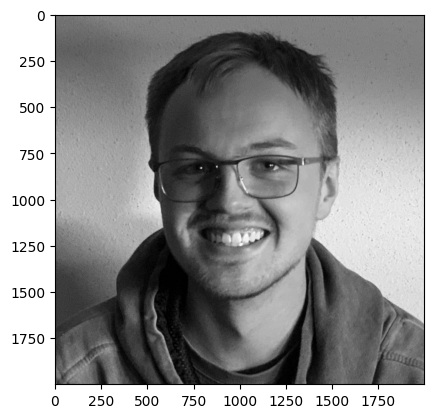

In [83]:
plt.imshow(img,cmap='gray')

**Récupération de l'image** <br>
Récupération de la liste d'image et calcul de l'image moyenne de la liste

In [84]:
Limg = [lecture_image(nom_image) for nom_image in Lnom] #Récupération des images
LimgVect = [img.flatten() for img in Limg] #Véctorisation des images
M = len(Limg)

In [85]:
sumVect = np.add.reduce(LimgVect) #Somme des vecteurs
meanVect = sumVect/M #Moyenne des vecteurs

**Affichage de l'image Moyenne**

In [86]:
meanImg = meanVect.reshape(2000,2000)

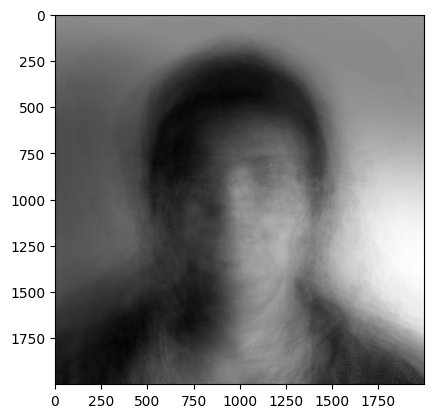

In [87]:
plt.imshow(meanImg,cmap='gray')

**Calcul des vecteurs d'écart à la moyenne**

In [88]:
VectEcart = {nom_image : np.subtract(LimgVect[i],meanVect) for i,nom_image in enumerate(Lnom)} #Vecteur d'écart

**Affichage des Vecteur d'écart** 

In [89]:
#plt.imshow(VectEcart["IMG_2148_R.jpeg"].reshape(2000,2000),)
#plt.colorbar()

KeyError: 'IMG_2148_R.jpeg'

In [ ]:
A = np.array([VectEcart[nom_image] for nom_image in Lnom]).T #Matrice des vecteurs d'écart

print("La matrice A est de dimension",A.shape)

La matrice A est de dimension (4000000, 60)


**Calcul des valeurs et des vecteurs propre**

In [ ]:
matAAT = np.dot(A.T,A) #Matrice AAt
print("La matrice AT.A est de dimension",matAAT.shape)
print(matAAT)

La matrice AT.A est de dimension (60, 60)
[[ 6.95759324e+09  4.91536687e+09 -3.63176493e+08 ...  3.97783206e+08
   7.19035486e+08  8.34530127e+08]
 [ 4.91536687e+09  6.61773483e+09 -1.58307273e+08 ...  5.56239586e+08
   9.84654865e+08  5.08906493e+08]
 [-3.63176493e+08 -1.58307273e+08  6.46043678e+09 ... -1.18997413e+09
  -9.62803183e+08 -1.77904367e+09]
 ...
 [ 3.97783206e+08  5.56239586e+08 -1.18997413e+09 ...  7.16601133e+09
   3.64819435e+09  3.76970004e+09]
 [ 7.19035486e+08  9.84654865e+08 -9.62803183e+08 ...  3.64819435e+09
   6.05259937e+09  4.35252334e+09]
 [ 8.34530127e+08  5.08906493e+08 -1.77904367e+09 ...  3.76970004e+09
   4.35252334e+09  7.47266415e+09]]


In [ ]:
Ai, Vi = np.linalg.eig(matAAT) #Calcul des valeurs propres et vecteurs propres

In [ ]:
LVectPropre = [np.dot(A,vi) for vi in Vi] #Vecteurs propres
dictValVectPropre = {Ai[i] : LVectPropre[i] for i in range(len(Ai))} #Dictionnaire des valeurs propres et des vecteurs propres

In [ ]:
matUi = np.array([dictValVectPropre[Ai[i]] for i in range(len(Ai))]) #Matrice des vecteurs propres

**Projection des vecteurs d'écart sur l'espace générer par les vecteurs propre**

In [ ]:
dictohmegai = {nom : np.dot(matUi,VectEcart[nom]) for nom in VectEcart.keys()} #Vecteur des coordonnées des images dans le repère des vecteurs propres

In [ ]:
display(dictohmegai["IMG_2148_R.jpeg"])

array([-3.95121923e+09,  8.34372694e+08, -1.10628308e+09,  1.30725336e+08,
        1.40813255e+09, -1.18486099e+09,  2.04616959e+09,  4.74084795e+08,
       -2.06110718e+08, -1.47044749e+09,  3.09764522e+09,  5.74570577e+08,
        2.11395844e+08,  7.99279299e+08,  3.07349450e+08,  3.56962215e+08,
       -1.01505452e+09, -1.01843994e+09,  7.80264473e+08, -1.72707871e+08,
       -7.50030304e+08, -7.97236348e+08,  2.81224108e+09,  8.76495355e+08,
       -2.21993755e+09, -3.02260072e+08,  2.30461120e+09, -1.95550349e+09,
        1.80991557e+09,  2.76455590e+09, -6.83284078e+08, -9.61287898e+08,
        1.22515820e+07,  1.62722304e+09,  1.71662456e+09, -1.01068601e+09,
       -2.70476075e+09, -2.43301037e+08,  1.86462680e+08,  1.55460076e+08,
        1.96407786e+09, -4.41003698e+08, -1.51156925e+09,  6.05510147e+08,
        1.44942478e+09,  6.84286572e+07, -5.55788258e+08,  1.00492926e+08,
       -2.46928487e+09, -8.12640700e+08,  3.48051108e+09,  1.54664763e+09,
        1.06151226e+09, -

## Recherche d'un élément dans la base 

In [ ]:
imgAReconnaitre = lecture_image("IMG_2148_R.jpeg")
ecartMoyenne = np.subtract(imgAReconnaitre.flatten(),meanVect)
vecteurPoids = np.dot(matUi,ecartMoyenne)


L'image la plus proche a une distance de 0.0 avec l'image IMG_2148_R.jpeg


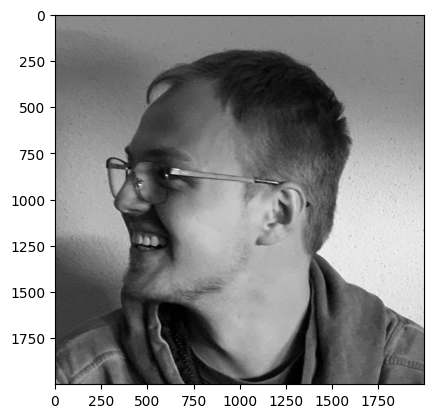

In [ ]:
#Comparaison des vecteurs poids
imgPlusProche = None
distPlusfaible = sys.maxsize


for name, img in dictohmegai.items() :
    dist = np.linalg.norm(img-vecteurPoids)
    if dist < distPlusfaible :
        distPlusfaible = dist 
        imgPlusProche = name
    #print(name, dist)
print("L'image la plus proche a une distance de",distPlusfaible,"avec l'image",imgPlusProche)
plt.imshow(lecture_image(imgPlusProche),cmap='gray')
